#Module Import

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Load

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Train / Test set으로 mnist 데이터 할당
print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


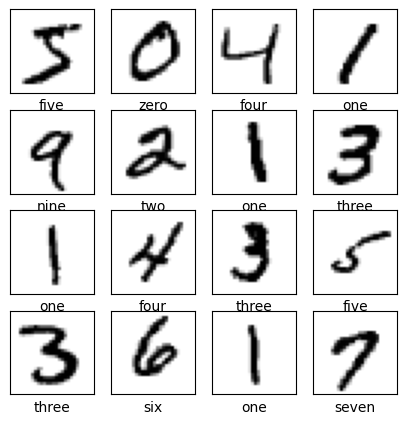

In [10]:
class_name = ['zero', 'one', 'two', 'three', 'four', 'five',
              'six', 'seven','eight', 'nine']

plt.figure(figsize=(5,5))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  img = x_train[i].reshape(28,28)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_name[y_train[i]])
plt.show()

# Hyper parameter

In [11]:
# MNIST dataset parameters
num_classes = 10
num_features = 28 * 28 # 784

# Training parameters
learning_rate = 0.01
steps = 1000
batch_size = 256

In [12]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [13]:
# data type 통일
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# data 구조를 통일
x_train = x_train.reshape([-1, num_features])
x_test = x_test.reshape([-1, num_features])
print(x_train.shape, x_test.shape)

x_train, x_test  = x_train / 255. , x_test / 255. # Normalizd
x_train, x_test = (x_train-np.mean(x_train)), (x_test-np.mean(x_test)) # Zero-Centering

(60000, 784) (10000, 784)


In [14]:
x_train[0].shape

(784,)

In [15]:
60000 * 28 * 28

47040000

# Variable

In [16]:
W = tf.Variable(tf.ones([num_features, num_classes]), name = 'weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

In [17]:
def softmax(x):
  z = tf.matmul(x, W) + b
  sm = tf.nn.softmax(z)
  return sm

def cross_entropy(y_pred, y_true):
  y_true = tf.one_hot(y_true, depth=num_classes)
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
  return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis = 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, axis=1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
tf.equal(1,2)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [18]:
y_data = [2,2,2,1,1,1,0,0]
one_hot = tf.one_hot(y_data, depth=3).numpy()
print(one_hot)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [21]:
for i in range(len(one_hot)):
  print(np.argmax(one_hot[i]))

2
2
2
1
1
1
0
0


In [22]:
print(tf.argmax(one_hot,axis=0))
print(tf.argmax(one_hot,axis=1))

tf.Tensor([6 3 0], shape=(3,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


In [23]:
ex1 = np.array([1,1,1,1,1,1,1,1,1])
ex2 = np.array([1,1,1,0,0,0,1,1,1])
print(tf.equal(ex1, ex2))
#sum(tf.equal(ex1,ex2))
#ex3 = tf.cast(tf.equal(ex1,ex2), tf.int32)
#print(ex3)
#print(tf.reduce_mean(ex3))

ex3 = tf.cast(tf.equal(ex1,ex2), tf.float32)
print(ex3)
print(tf.reduce_mean(ex3))

tf.Tensor([ True  True  True False False False  True  True  True], shape=(9,), dtype=bool)
tf.Tensor([1. 1. 1. 0. 0. 0. 1. 1. 1.], shape=(9,), dtype=float32)
tf.Tensor(0.6666667, shape=(), dtype=float32)


# Optimizer

In [24]:
optimizer = tf.optimizers.SGD(learning_rate)

In [25]:
def run_optimization(x,y):
  with tf.GradientTape() as tape:
    pred = softmax(x)
    loss = cross_entropy(pred, y)

  gradients = tape.gradient(loss, [W,b])

  optimizer.apply_gradients(zip(gradients, [W,b]))

# Batch Size

In [26]:
print(x_train.shape)

(60000, 784)


In [27]:
n_train = x_train.shape[0] # 60000
n_test = x_test.shape[0]   # 10000

def train_batch_maker(batch_size):
  random_idx = np.random.randint(n_train, size = batch_size) # (batch_size,) vector
  return x_train[random_idx], y_train[random_idx]            # (batch_size, 28*28)

def test_batch_maker(batch_size):
  random_idx = np.random.randint(n_test, size = batch_size)   # (batch_size,) vector
  return x_test[random_idx], y_test[random_idx]               # (batch_size, 28*28)

In [28]:
print(np.random.randint(10, size=10))    # 0~9까지 중에서 10개의 정수를 임의추출
print(np.random.randint(10,20, size=10)) # 10~19까지 중에서 10개의 정수를 임의추출
print(np.random.randint(10, size=(3,5))) # 0~9까지 중에서 (3,5)개의 정수를 임의추출

[7 5 9 6 2 3 3 7 2 5]
[13 13 10 18 15 19 11 17 10 15]
[[5 1 5 7 1]
 [7 2 7 1 4]
 [5 4 4 9 5]]


# Training

In [29]:
for step in range(steps):
  batch_x, batch_y = train_batch_maker(batch_size)

  # Run the optimization to update W and b values
  run_optimization(batch_x, batch_y)

  if step % 100 == 0:
    pred = softmax(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print(f"step: {step} loss: {loss} accuracy: {acc}")

step: 0 loss: 2.2907698154449463 accuracy: 0.66796875
step: 100 loss: 1.4713634252548218 accuracy: 0.83984375
step: 200 loss: 1.1598544120788574 accuracy: 0.81640625
step: 300 loss: 0.9110034704208374 accuracy: 0.86328125
step: 400 loss: 0.878616988658905 accuracy: 0.8203125
step: 500 loss: 0.7843178510665894 accuracy: 0.828125
step: 600 loss: 0.7062539458274841 accuracy: 0.8828125
step: 700 loss: 0.6907051801681519 accuracy: 0.85546875
step: 800 loss: 0.6777374744415283 accuracy: 0.83984375
step: 900 loss: 0.741544246673584 accuracy: 0.81640625


# Test

In [30]:
pred = softmax(x_test)
print(f"Test Accuracy: {accuracy(pred, y_test)}")

Test Accuracy: 0.8712000250816345


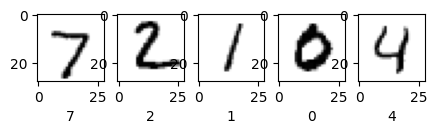

In [31]:
#Predict 5 images from validaton set.
num_images = 5
test_images = x_test[:num_images]
predictions = softmax(test_images)

# Visualize image and model predcition
plt.figure(figsize = (5,5))
for i in range(num_images):
  plt.subplot(1, num_images, i+1)
  plt.imshow(np.reshape(test_images[i], [28,28]), cmap=plt.cm.binary)
  plt.xlabel(np.argmax(predictions.numpy()[i]))

plt.show()